In [92]:
import pandas as pd

## 载入数据

从`https://github.com/genzj/data-analysis-course/raw/main/data/ch-03/titanic.csv` 载入数据

In [93]:
titanic = pd.read_csv('https://github.com/genzj/data-analysis-course/raw/main/data/ch-03/titanic.csv')

## 缺失数据处理

### `Age`列有多少缺失数据？

In [94]:
titanic.Age.isna().sum()

177

In [95]:
titanic[titanic.Age.isna()].shape

(177, 12)

In [96]:
import numpy as np

np.count_nonzero(titanic.Age.isna())

177

In [97]:
np.bincount(titanic.Age.isna())

array([714, 177])

In [98]:
titanic.Age.isna().value_counts()

False    714
True     177
Name: Age, dtype: int64

### 使用Age列平均值填充缺失数据

In [99]:
titanic.Age.fillna(titanic.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

### 丢弃Age列和Embarked列都缺失的数据

In [100]:
titanic.dropna(subset=['Age', 'Embarked'], how='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 分组分析

### 对比不同性别乘客的幸存率

In [101]:
titanic.groupby('Sex').Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [102]:
titanic.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [103]:
titanic.groupby(['Sex', 'Survived']).count()

PassengerId  Pclass  Name  Age  ...  Ticket  Fare  Cabin  Embarked
Sex    Survived                                  ...                               
female 0                  81      81    81   64  ...      81    81      6        81
       1                 233     233   233  197  ...     233   233     91       231
male   0                 468     468   468  360  ...     468   468     62       468
       1                 109     109   109   93  ...     109   109     45       109

[4 rows x 10 columns]

### 对比不同年龄乘客的幸存率

（每10岁一个分段）

In [104]:
bins = pd.cut(titanic.Age, range(0, 110, 10))
titanic.groupby([bins, 'Survived']).count()

PassengerId  Pclass   Name  ...   Fare  Cabin  Embarked
Age       Survived                              ...                        
(0, 10]   0                26.0    26.0   26.0  ...   26.0    2.0      26.0
          1                38.0    38.0   38.0  ...   38.0    8.0      38.0
(10, 20]  0                71.0    71.0   71.0  ...   71.0    4.0      71.0
          1                44.0    44.0   44.0  ...   44.0   15.0      44.0
(20, 30]  0               146.0   146.0  146.0  ...  146.0   10.0     146.0
          1                84.0    84.0   84.0  ...   84.0   30.0      84.0
(30, 40]  0                86.0    86.0   86.0  ...   86.0   12.0      86.0
          1                69.0    69.0   69.0  ...   69.0   38.0      68.0
(40, 50]  0                53.0    53.0   53.0  ...   53.0   16.0      53.0
          1                33.0    33.0   33.0  ...   33.0   17.0      33.0
(50, 60]  0                25.0    25.0   25.0  ...   25.0    8.0      25.0
          1                17.0    17.0   17.0  ...   17.0   14.0      17.0
(60, 70]  0                13.0    13.0   13.0  ...   13.0    7.0      13.0
          1                 4.0     4.0    4.0  ...    4.0    2.0       3.0
(70, 80]  0                 4.0     4.0    4.0  ...    4.0    1.0       4.0
          1                 1.0     1.0    1.0  ...    1.0    1.0       1.0
(80, 90]  0                 NaN     NaN    NaN  ...    NaN    NaN       NaN
          1                 NaN     NaN    NaN  ...    NaN    NaN       NaN
(90, 100] 0                 NaN     NaN    NaN  ...    NaN    NaN       NaN
          1                 NaN     NaN    NaN  ...    NaN    NaN       NaN

[20 rows x 11 columns]

In [105]:
bins = pd.cut(titanic.Age, range(0, int(titanic.Age.max())+10, 10))
titanic.groupby(bins).Survived.value_counts()

Age       Survived
(0, 10]   1            38
          0            26
(10, 20]  0            71
          1            44
(20, 30]  0           146
          1            84
(30, 40]  0            86
          1            69
(40, 50]  0            53
          1            33
(50, 60]  0            25
          1            17
(60, 70]  0            13
          1             4
(70, 80]  0             4
          1             1
Name: Survived, dtype: int64

### 分性别填充缺失的Age数据

即对于Age缺失的行，如果是男性则使用男性的平均年龄，如果是女性则使用女性平均年龄填充。

In [107]:
titanic.groupby('Sex').Age.transform(lambda group: group.fillna(group.mean()))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    27.915709
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [108]:
titanic.groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [109]:
titanic.Age.fillna(titanic.Age.mean()).groupby(titanic.Sex).mean()

Sex
female    28.216730
male      30.505824
Name: Age, dtype: float64

In [110]:
titanic.Age.mean()

29.69911764705882

## 课后练习

阅读Pandas文档或相关书籍，理解以下代码是如何将分组统计数据转换为习惯的表格形式的。

Survived,No,Yes
Age,,
"(0, 10]",26,38
"(10, 20]",71,44
"(20, 30]",146,84
"(30, 40]",86,69
"(40, 50]",53,33
"(50, 60]",25,17
"(60, 70]",13,4
"(70, 80]",4,1


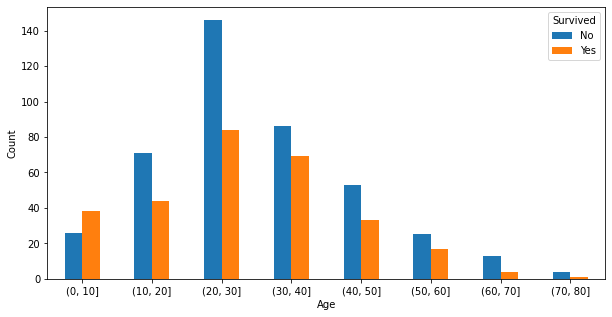

In [106]:
answer = pd.DataFrame(titanic.groupby(bins).Survived.value_counts())
answer.index.set_levels(['No', 'Yes'], level=1, inplace=True)
answer = answer.unstack()
answer.columns = answer.columns.droplevel(0)

ax = answer.plot.bar(figsize=(10, 5))
ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel('Count')
answer